# Artificial Neural Networks

**Run this cell first** to import all the needed class and functions

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Classification using ANN

**Run this cell first** to import all the needed class and functions

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Load data set for classifier

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Prepare x and y, train and test set

In [ ]:
y = data.loc[:,"Purchased"]
x_orig = data.loc[:, "Gender":"EstimatedSalary"]
x_encoded = x_orig.copy()
x_encoded.loc[:,"Gender"] = (x_encoded.loc[:,"Gender"] == "Female").astype(int)
x_encoded.head()
x_encoded.loc[:,"EstimatedSalary"] = x_encoded.loc[:,"EstimatedSalary"] / 1000

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=12345)

#### Exercise
Refer to documentation https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Use the right parameters to
- set no. of hidden layers and no. of nodes for each hidden layer
- set activation function as sigmoid (logistic)
- set learning rate ${\eta}$
- set algorithm as stochastic gradient descent
- set random_state to a fixed value to get the same results on repeated runs

In [ ]:
clf = MLPClassifier(solver='sgd',
                    activation='logistic',
                    hidden_layer_sizes=(5,), #(10,) means only 1 element in the tuple
                    learning_rate_init=0.1,
                    random_state=1,
                    max_iter=200)
clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=0.1, random_state=1, solver='sgd')

#### Check performance of model

Predict y ('Purchased') for the test set

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Use score() for the accuracy rate on the given test data set with known y

In [ ]:
clf.score(x_test, y_test)

0.6833333333333333

#### Exercise
- Try different no. of nodes in one single hidden layer
- OR
- Increase the number of hidden layers

See if the accuracy score is improved.

NOTE: if the ANN is too complicated, you might need to increase `max_iter` to allow the model to converge before running out of max iterations

#### Loss curve
Use loss_curve_ to see how the training reduces the loss with each additional observation in each iteration

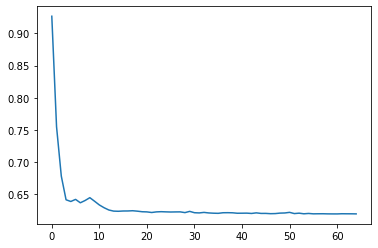

In [ ]:
plt.plot(clf.loss_curve_)

#### Display weights

In [ ]:
print(clf.coefs_)

[array([[-0.082982  ,  0.20917217, -0.49980715, -0.23527232, -0.35342061],
       [-0.40823098, -0.92539363, -0.1525979 , -0.572529  ,  0.02247643],
       [-0.08145329, -0.83077469, -0.29423211,  0.71945716, -0.4825451 ]]), array([[ 0.34714895],
       [ 0.31549814],
       [-0.21575755],
       [-1.00596663],
       [ 0.43310401]])]


#### Exercise
If we created a MLPClassifier with `hidden_layer_sizes=(5,)`
- How many input nodes in the input layer?
- How many output nodes in the output layer?
- How many weights from input layer to hidden layer?
- How many weights from hidden layer to output layer?

Write down your answers in this markdown cell
- 3 input nodes, since 3 input variables
- 1 output node, since only 1 target variable
- 3 nodes to 5 nodes, hence 15 weights
- 5 nodes to 1 node, hence 5 weights

#### Exercise
How to retrieve the weight of bias term of input layer and hidden layer(s)?

In [ ]:
print(clf.intercepts_)

[array([ 0.17043835, -0.10059872,  0.0587634 , -0.2034475 , -0.30253429]), array([0.13738869])]


#### Exercise
If we created a MLPClassifier with `hidden_layer_sizes=(5,)`
- How many weights from bias in input layer to hidden layer?
- How many weights from bias in hidden layer to output layer?

Write down your answers in this markdown cell
- 1 bias term in input layer is connected with 5 nodes in hidden layer, hence 5 weights
- 1 bias term in hidden layer is connected with 1 node in output layer, hence 1 weight

### Regression using ANN

#### Install tensorflow library

In [ ]:
!pip install tensorflow

#### Load data set for regression

Dataset: House Sales in King County, USA

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [ ]:
house = pd.read_csv('house_prices.csv')
display(house.head())
# condo = condo.head(200)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Prepare x and y, train and test set

In [ ]:
x = house.loc[:, 'bedrooms':'sqft_basement']
# x = pd.concat([condo.loc[:, 'bedrooms':'sqft_basement'],condo.loc[:, 'sqft_living15':'sqft_lot15']], axis=1)
y = house['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
x_train.head()

In [ ]:
x_test.head()

Perform standardization on all input variables of training set, then use the same scaler on the test set

In [ ]:
sc = StandardScaler()
scaler = sc.fit(x_train)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Run ANN with MLPRegressor class

Use MLPRegressor class from sklearn library first and see if the calculation converges to a solution

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(150,100,50),
                    max_iter = 300,
                    activation = 'relu',
                    learning_rate = 'adaptive',
                    learning_rate_init = 0.01,
                    solver = 'sgd')

model.fit(x_train_scaled, y_train)

C:\Users\hbisx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(hidden_layer_sizes=(150, 100, 50), learning_rate='adaptive',
             learning_rate_init=0.01, max_iter=300, solver='sgd')

#### Run ANN with tensorflow library

Refer to official documentation
- https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

#### Exercise

- Add 4 layers of 19 nodes in each layer to the model
- activation function is ReLU

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Input(shape=(11,)))

model.add(Dense(19,activation='logistic'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit(x=x_train,
          y=y_train,
          batch_size=128, epochs=400)

Epoch 1/400
136/136 [==============================] - 2s 3ms/step - loss: 373523185664.0000
Epoch 2/400
136/136 [==============================] - 0s 3ms/step - loss: 312157536256.0000
Epoch 3/400
136/136 [==============================] - 0s 3ms/step - loss: 215350263808.0000
Epoch 4/400
136/136 [==============================] - 0s 3ms/step - loss: 85616476160.0000
Epoch 5/400
136/136 [==============================] - 0s 3ms/step - loss: 65413582848.0000
Epoch 6/400
136/136 [==============================] - 0s 3ms/step - loss: 64928964608.0000
Epoch 7/400
136/136 [==============================] - 0s 3ms/step - loss: 64599433216.0000
Epoch 8/400
136/136 [==============================] - 0s 3ms/step - loss: 64419385344.0000
Epoch 9/400
136/136 [==============================] - 0s 3ms/step - loss: 64226447360.0000
Epoch 10/400
136/136 [==============================] - 0s 3ms/step - loss: 64067596288.0000
Epoch 11/400
136/136 [==============================] - 0s 3ms/step - loss: 

136/136 [==============================] - 0s 3ms/step - loss: 63579725824.0000
Epoch 90/400
136/136 [==============================] - 0s 3ms/step - loss: 63444209664.0000
Epoch 91/400
136/136 [==============================] - 0s 3ms/step - loss: 63380041728.0000
Epoch 92/400
136/136 [==============================] - 0s 3ms/step - loss: 63660630016.0000
Epoch 93/400
136/136 [==============================] - 0s 3ms/step - loss: 63988731904.0000
Epoch 94/400
136/136 [==============================] - 0s 3ms/step - loss: 63392108544.0000
Epoch 95/400
136/136 [==============================] - 0s 3ms/step - loss: 63405862912.0000
Epoch 96/400
136/136 [==============================] - 0s 3ms/step - loss: 63330086912.0000
Epoch 97/400
136/136 [==============================] - 0s 3ms/step - loss: 63572426752.0000
Epoch 98/400
136/136 [==============================] - 0s 3ms/step - loss: 63439962112.0000
Epoch 99/400
136/136 [==============================] - 0s 3ms/step - loss: 6340150

136/136 [==============================] - 0s 3ms/step - loss: 63305310208.0000
Epoch 177/400
136/136 [==============================] - 0s 3ms/step - loss: 63054946304.0000
Epoch 178/400
136/136 [==============================] - 0s 3ms/step - loss: 63117365248.0000
Epoch 179/400
136/136 [==============================] - 0s 3ms/step - loss: 62995611648.0000
Epoch 180/400
136/136 [==============================] - 0s 3ms/step - loss: 63255461888.0000
Epoch 181/400
136/136 [==============================] - 0s 3ms/step - loss: 63144865792.0000
Epoch 182/400
136/136 [==============================] - 0s 3ms/step - loss: 63026221056.0000
Epoch 183/400
136/136 [==============================] - 0s 3ms/step - loss: 63129456640.0000
Epoch 184/400
136/136 [==============================] - 0s 3ms/step - loss: 63085273088.0000
Epoch 185/400
136/136 [==============================] - 0s 3ms/step - loss: 63098982400.0000
Epoch 186/400
136/136 [==============================] - 0s 3ms/step - los

136/136 [==============================] - 0s 3ms/step - loss: 61651230720.0000
Epoch 264/400
136/136 [==============================] - 0s 2ms/step - loss: 61556584448.0000
Epoch 265/400
136/136 [==============================] - 0s 2ms/step - loss: 61640409088.0000
Epoch 266/400
136/136 [==============================] - 0s 3ms/step - loss: 61426110464.0000
Epoch 267/400
136/136 [==============================] - 0s 2ms/step - loss: 61606510592.0000
Epoch 268/400
136/136 [==============================] - 0s 3ms/step - loss: 61646712832.0000
Epoch 269/400
136/136 [==============================] - 0s 3ms/step - loss: 61478957056.0000
Epoch 270/400
136/136 [==============================] - 0s 3ms/step - loss: 61447929856.0000
Epoch 271/400
136/136 [==============================] - 0s 2ms/step - loss: 61508988928.0000
Epoch 272/400
136/136 [==============================] - 0s 2ms/step - loss: 61322600448.0000
Epoch 273/400
136/136 [==============================] - 0s 2ms/step - los

136/136 [==============================] - 0s 2ms/step - loss: 59847888896.0000
Epoch 351/400
136/136 [==============================] - 0s 2ms/step - loss: 59870478336.0000
Epoch 352/400
136/136 [==============================] - 0s 2ms/step - loss: 59663851520.0000
Epoch 353/400
136/136 [==============================] - 0s 2ms/step - loss: 59417645056.0000
Epoch 354/400
136/136 [==============================] - 0s 2ms/step - loss: 59537965056.0000
Epoch 355/400
136/136 [==============================] - 0s 2ms/step - loss: 59361943552.0000
Epoch 356/400
136/136 [==============================] - 0s 2ms/step - loss: 59507044352.0000
Epoch 357/400
136/136 [==============================] - 0s 2ms/step - loss: 59941048320.0000
Epoch 358/400
136/136 [==============================] - 0s 2ms/step - loss: 59391668224.0000
Epoch 359/400
136/136 [==============================] - 0s 2ms/step - loss: 59565821952.0000
Epoch 360/400
136/136 [==============================] - 0s 2ms/step - los

#### Exercise
Understand how batch_size and epochs work. Write down comments here

One Epoch
- An entire data set goes forward and backward through the ANN ONCE
- Passing the entire dataset through ANN once is not enough, i.e. we need to pass the full dataset through the same ANN **multiple times**!

Batch Size
- Total number of training observations (rows) in a single batch
- divide dataset into batches

<div>
<img src="attachment:image.png" width="400"/>
</div>

#### Check performance of model

Predict y ('Price') for the test set

In [ ]:
y_pred = model.predict(x_test)
y_pred

136/136 [==============================] - 1s 2ms/step


array([[ 679828.75],
       [ 390320.75],
       [ 510720.2 ],
       ...,
       [ 444249.4 ],
       [1317392.4 ],
       [ 350806.56]], dtype=float32)

Use MSE to check performance

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(explained_variance_score(y_test, y_pred))

272979.6396614062
0.5687908632639744


# Recurrent Neural Networks (RNN) - optional

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

# For time stamps
from datetime import datetime

In [ ]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

apple = yf.download("AAPL", start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-17,126.820000,126.930000,125.169998,126.269997,125.552681,74244600
2021-05-18,126.559998,126.989998,124.779999,124.849998,124.140755,63342900
2021-05-19,123.160004,124.919998,122.860001,124.690002,123.981667,92612000
2021-05-20,125.230003,127.720001,125.099998,127.309998,126.586784,76857100
2021-05-21,127.820000,128.000000,125.209999,125.430000,124.717461,79295400


Text(0.5, 1.0, 'Closing Price of Apple')

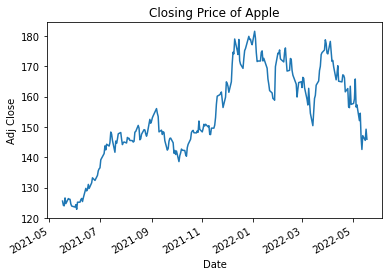

In [ ]:
apple['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.title("Closing Price of Apple")

In [ ]:
timeseries = apple['Adj Close'].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
timeseries_scaled = scaler.fit_transform(timeseries.reshape(-1,1))

# timeseries_scaled

#### Split the data into 80% train vs 20% test
Create train set

In [ ]:
train_size = int(len(timeseries_scaled) * 0.8)

x_train = []
y_train = []

for i in range(60, train_size):
    x_train.append(timeseries_scaled[i-60:i, 0])
    y_train.append(timeseries_scaled[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train

array([[0.04626411, 0.02219999, 0.01948858, ..., 0.38670453, 0.38585594,
        0.37753992],
       [0.02219999, 0.01948858, 0.06388882, ..., 0.38585594, 0.37753992,
        0.3819524 ],
       [0.01948858, 0.06388882, 0.03202906, ..., 0.37753992, 0.3819524 ,
        0.43337798],
       ...,
       [0.7163236 , 0.8159245 , 0.8822124 , ..., 0.71649967, 0.68382435,
        0.74100641],
       [0.8159245 , 0.8822124 , 0.87337391, ..., 0.68382435, 0.74100641,
        0.7353901 ],
       [0.8822124 , 0.87337391, 0.95648839, ..., 0.74100641, 0.7353901 ,
        0.68331358]])

Reshape each row of x_train to 2D (1 column only)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.04626411],
        [0.02219999],
        [0.01948858],
        ...,
        [0.38670453],
        [0.38585594],
        [0.37753992]],

       [[0.02219999],
        [0.01948858],
        [0.06388882],
        ...,
        [0.38585594],
        [0.37753992],
        [0.3819524 ]],

       [[0.01948858],
        [0.06388882],
        [0.03202906],
        ...,
        [0.37753992],
        [0.3819524 ],
        [0.43337798]],

       ...,

       [[0.7163236 ],
        [0.8159245 ],
        [0.8822124 ],
        ...,
        [0.71649967],
        [0.68382435],
        [0.74100641]],

       [[0.8159245 ],
        [0.8822124 ],
        [0.87337391],
        ...,
        [0.68382435],
        [0.74100641],
        [0.7353901 ]],

       [[0.8822124 ],
        [0.87337391],
        [0.95648839],
        ...,
        [0.74100641],
        [0.7353901 ],
        [0.68331358]]])

Create test set

In [ ]:
test_data = timeseries_scaled[train_size - 60:]
x_test = []
y_test = timeseries[train_size:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the test set
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#### Train the RNN

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
2/2 [==============================] - 6s 99ms/step - loss: 0.4348
Epoch 2/50
2/2 [==============================] - 0s 148ms/step - loss: 0.0635
Epoch 3/50
2/2 [==============================] - 0s 96ms/step - loss: 0.0697
Epoch 4/50
2/2 [==============================] - 0s 93ms/step - loss: 0.0455
Epoch 5/50
2/2 [==============================] - 0s 97ms/step - loss: 0.0118
Epoch 6/50
2/2 [==============================] - 0s 159ms/step - loss: 0.0225
Epoch 7/50
2/2 [==============================] - 0s 126ms/step - loss: 0.0316
Epoch 8/50
2/2 [==============================] - 0s 176ms/step - loss: 0.0269
Epoch 9/50
2/2 [==============================] - 0s 126ms/step - loss: 0.0161
Epoch 10/50
2/2 [==============================] - 0s 161ms/step - loss: 0.0099
Epoch 11/50
2/2 [==============================] - 0s 105ms/step - loss: 0.0118
Epoch 12/50
2/2 [==============================] - 0s 161ms/step - loss: 0.0156
Epoch 13/50
2/2 [==============================] - 0s

#### Get the models predicted price values and RMSE to check performance

In [ ]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

print(np.sqrt(mean_squared_error(y_test, y_pred)))


2/2 [==============================] - 2s 25ms/step
7.259150374715251


#### Visualize the actual stock fluctuation vs. the prediction

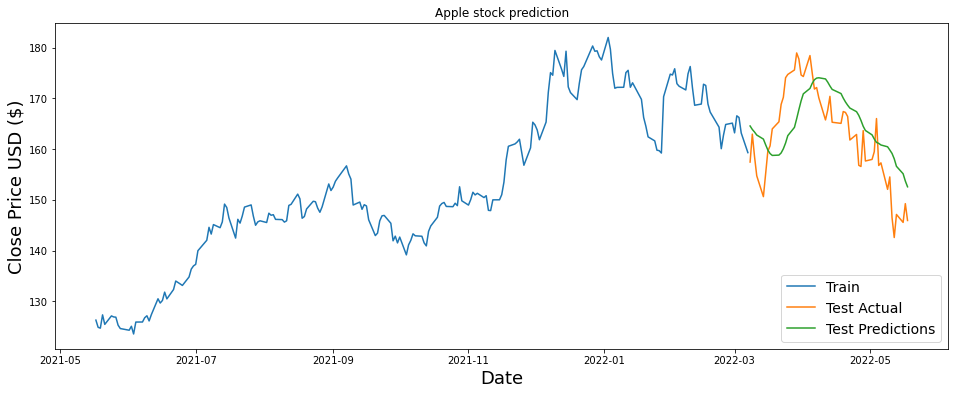

In [ ]:
train = apple.iloc[:train_size]
test = apple.iloc[train_size:].copy()
test['Predictions'] = y_pred

plt.figure(figsize=(16,6))
plt.title('Apple stock prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test Actual', 'Test Predictions'], loc='lower right', fontsize=14)
plt.show()